In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
data = files.upload()

TypeError: ignored

In [ ]:
data

{'Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2.csv': b"COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME ,HARDSHIP_INDEX\r\n1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39\r\n2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46\r\n3,Uptown,3.8,24,8.9,11.8,22.2,35787,20\r\n4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17\r\n5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6\r\n6,Lake View,1.1,11.4,4.7,2.6,17,60058,5\r\n7,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2\r\n8,Near North Side,1.9,12.9,7,2.5,22.6,88669,1\r\n9,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8\r\n10,Norwood Park,2,5.4,9,11.5,39.5,32875,21\r\n11,Jefferson Park,2.7,8.6,12.4,13.4,35.5,27751,25\r\n12,Forest Glen,1.1,7.5,6.8,4.9,40.5,44164,11\r\n13,North Park,3.9,13.2,9.9,14.4,39,26576,33\r\n14,Albany Park,11.3,19.2,10,32.9,32,21323,53\r\n15,P

In [ ]:
data = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2.csv')

In [ ]:
data.tail()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0
77,NaN,CHICAGO,4.7,19.7,12.9,19.5,33.5,28202,NaN


In [ ]:
data

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [ ]:
data.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


HANDLING MISSING DATA

In [ ]:
data.drop("COMMUNITY_AREA_NUMBER",axis=1,inplace=True)

In [ ]:
data.isna().sum()

COMMUNITY_AREA_NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER_CAPITA_INCOME                               0
HARDSHIP_INDEX                                  1
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

COMMUNITY_AREA_NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER_CAPITA_INCOME                               0
HARDSHIP_INDEX                                  0
dtype: int64

In [ ]:
data.duplicated().sum()

0

TEKS INFO DATA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NAME                           77 non-null     object 
 1   PERCENT OF HOUSING CROWDED                    77 non-null     float64
 2   PERCENT HOUSEHOLDS BELOW POVERTY              77 non-null     float64
 3   PERCENT AGED 16+ UNEMPLOYED                   77 non-null     float64
 4   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  77 non-null     float64
 5   PERCENT AGED UNDER 18 OR OVER 64              77 non-null     float64
 6   PER_CAPITA_INCOME                             77 non-null     int64  
 7   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.4+ KB


In [ ]:
numerik = ['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 
           'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 'HARDSHIP_INDEX']
kategorik = ['COMMUNITY_AREA_NAME']

VISUALISASI DATA

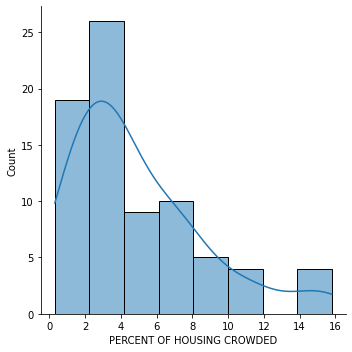

In [ ]:
sns.displot(data['PERCENT OF HOUSING CROWDED'],kde=True)
plt.show()

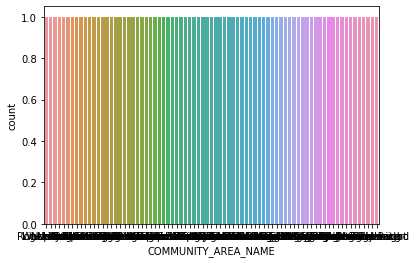

In [ ]:
sns.countplot(x = 'COMMUNITY_AREA_NAME', data = data)
plt.show()

In [ ]:
cek_corr = numerik
cek_corr.append('HARDSHIP_INDEX')

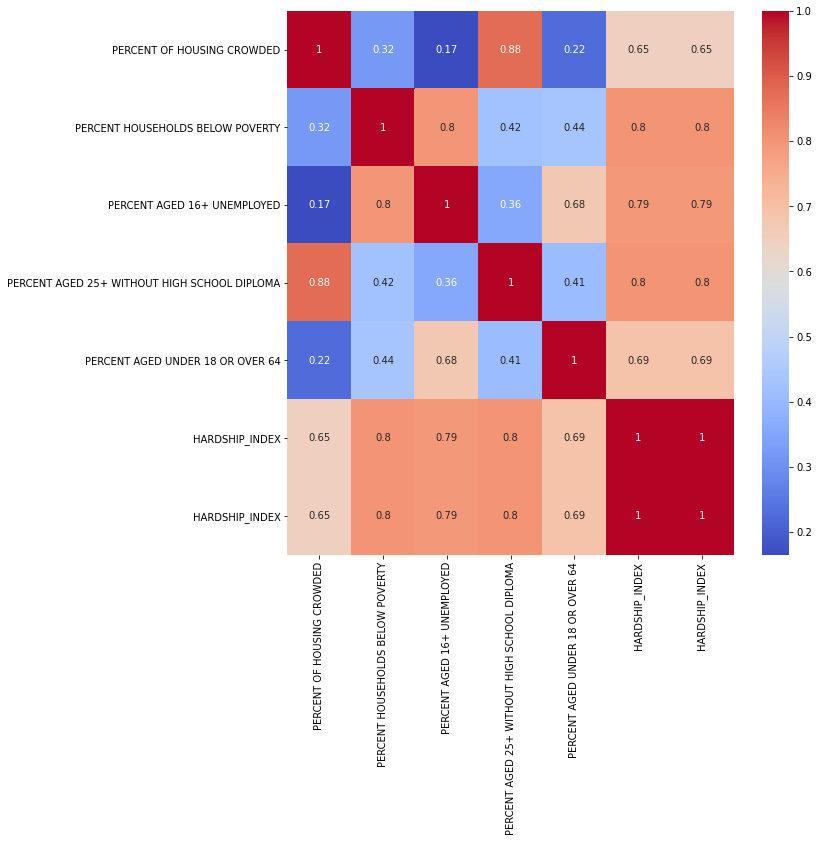

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data[cek_corr].corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
X = pd.concat([data[numerik]],axis=1)
Y = data['HARDSHIP_INDEX']

Split Train-Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [ ]:
print(f'Banyak data train: {len(X_train)}')
print(f'Banyak data test: {len(X_test)}')

Banyak data train: 61
Banyak data test: 16


REGRESI

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,lr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,lr_pred))}')
print(f'R2: {r2_score(y_test,lr_pred)}')
print(f'MAE: {mean_absolute_error(y_test,lr_pred)}')

MSE: 3.140652478911153e-29
RMSE: 5.60415245948141e-15
R2: 1.0
MAE: 3.83026943495679e-15


In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(X_train,y_train)
rr_pred = rr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,rr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,rr_pred))}')
print(f'R2: {r2_score(y_test,rr_pred)}')
print(f'MAE: {mean_absolute_error(y_test,rr_pred)}')

MSE: 9.472878669713493e-06
RMSE: 0.0030778041961296845
R2: 0.9999999873951644
MAE: 0.0023256903845143007


In [ ]:
from sklearn.linear_model import Lasso
ll = Lasso()
ll.fit(X_train,y_train)
ll_pred = ll.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,ll_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,ll_pred))}')
print(f'R2: {r2_score(y_test,ll_pred)}')
print(f'MAE: {mean_absolute_error(y_test,ll_pred)}')

MSE: 0.001350891394491229
RMSE: 0.03675447448258823
R2: 0.9999982024720647
MAE: 0.030661942189698227


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,svr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,svr_pred))}')
print(f'R2: {r2_score(y_test,svr_pred)}')
print(f'MAE: {mean_absolute_error(y_test,svr_pred)}')

MSE: 0.004641571456511623
RMSE: 0.06812907937519502
R2: 0.9999938238156002
MAE: 0.053013814730174524


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,dtr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,dtr_pred))}')
print(f'R2: {r2_score(y_test,dtr_pred)}')
print(f'MAE: {mean_absolute_error(y_test,dtr_pred)}')

MSE: 17.5625
RMSE: 4.190763653560053
R2: 0.9766309234839468
MAE: 3.0625


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,rf_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,rf_pred))}')
print(f'R2: {r2_score(y_test,rf_pred)}')
print(f'MAE: {mean_absolute_error(y_test,rf_pred)}')

MSE: 1.1189875000000002
RMSE: 1.0578220549790027
R2: 0.9985110488536366
MAE: 0.79125


In [ ]:
hasil_akhir = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(rf_pred)],axis=1)
hasil_akhir.columns = ['Real','Predicted']

In [ ]:
hasil_akhir

,Real,Predicted
0,5.0,5.09
1,14.0,14.50
2,11.0,9.73
3,56.0,55.31
4,10.0,8.47
5,51.0,50.70
6,29.0,29.00
7,32.0,33.01
8,37.0,36.57
9,42.0,41.99


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(lr, X_test, y_test, cv = 5)

array([1., 1., 1., 1., 1.])

KLASIFIKASI

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [ ]:
svc.fit(X_train,y_train.values.ravel())
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,svc_pred)

0.0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,svc_pred)

In [ ]:
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(33.0, 0.5, 'Actual')

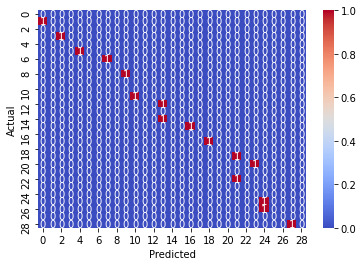

In [ ]:
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       1.0
         3.0       0.00      0.00      0.00       0.0
         5.0       0.00      0.00      0.00       1.0
         7.0       0.00      0.00      0.00       0.0
        10.0       0.00      0.00      0.00       1.0
        11.0       0.00      0.00      0.00       1.0
        12.0       0.00      0.00      0.00       0.0
        14.0       0.00      0.00      0.00       1.0
        15.0       0.00      0.00      0.00       0.0
        28.0       0.00      0.00      0.00       0.0
        29.0       0.00      0.00      0.00       1.0
        32.0       0.00      0.00      0.00       1.0
        35.0       0.00      0.00      0.00       0.0
        37.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        43.0       0.00      0.00      0.00       0.0
        51.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=100, random_state=0)

In [ ]:
(X,y)

(array([[-0.03926799,  0.13191176, -0.21120598, ...,  1.97698901,
          1.02122474, -0.46931074],
        [ 0.77416061,  0.10490717, -0.33281176, ...,  1.2678044 ,
          0.62251914, -1.49026539],
        [-0.0148577 ,  0.67057045, -0.21416666, ..., -0.10486202,
         -0.10169727, -0.45130304],
        ...,
        [ 0.29673317, -0.49610233, -0.86404499, ..., -1.10453952,
          2.01406015,  0.69042902],
        [ 0.08617684,  0.9836362 ,  0.17124355, ...,  2.11564734,
          0.11273794,  1.20985013],
        [-1.58249448, -1.42279491, -0.56430103, ...,  1.26661394,
         -1.31771734,  1.61805427]]),
 array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier()

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([ 1., 26., 12., 34.,  7., 60., 28., 25., 35., 34., 47., 57., 88.,
       73.,  1., 73.])

CLUSTERING

In [ ]:
X

array([[-0.03926799,  0.13191176, -0.21120598, ...,  1.97698901,
         1.02122474, -0.46931074],
       [ 0.77416061,  0.10490717, -0.33281176, ...,  1.2678044 ,
         0.62251914, -1.49026539],
       [-0.0148577 ,  0.67057045, -0.21416666, ..., -0.10486202,
        -0.10169727, -0.45130304],
       ...,
       [ 0.29673317, -0.49610233, -0.86404499, ..., -1.10453952,
         2.01406015,  0.69042902],
       [ 0.08617684,  0.9836362 ,  0.17124355, ...,  2.11564734,
         0.11273794,  1.20985013],
       [-1.58249448, -1.42279491, -0.56430103, ...,  1.26661394,
        -1.31771734,  1.61805427]])

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
elbow = []
for i in range(2,20) : kmeans = KMeans(n_clusters=i)
kmeans.fit(X)
elbow.append(kmeans.inertia_)

ValueError: ignored

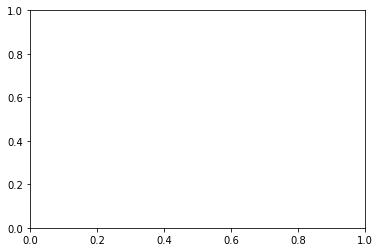

In [ ]:
plt.plot(range(2,20),elbow,'bo-')
plt.xlabel('Banyak cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([5, 5, 0, 0, 4, 3, 7, 3, 6, 0, 5, 1, 0, 7, 2, 0, 7, 0, 1, 5, 7, 2,
       7, 3, 5, 2, 2, 0, 3, 7, 7, 3, 0, 6, 7, 0, 5, 7, 6, 3, 2, 3, 6, 0,
       3, 5, 2, 4, 4, 6, 4, 4, 4, 2, 5, 3, 5, 3, 7, 3, 4, 6, 5, 5, 0, 5,
       2, 0, 5, 5, 6, 5, 0, 5, 2, 3, 4, 0, 5, 3, 4, 4, 5, 5, 4, 5, 5, 0,
       1, 6, 0, 0, 3, 6, 5, 5, 2, 2, 6, 4], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X,kmeans.labels_)

0.08278941471282261

In [ ]:
ag = AgglomerativeClustering(n_clusters=8)
ag.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=8)

In [ ]:
silhouette_score(X,ag.labels_)

0.07553618792351706

In [ ]:
""

''